IMPORTING THE DEPENDENCIES

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

DATA LOADING AND PREPROCESSING

In [ ]:
diabetes_df = pd.read_csv('/content/archive (3).zip')

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


SPLITTING THE DATASET INTO FEATURES(X) AND TARGET(Y)

In [ ]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

SPLITTING THE DATASET INTO TRAINING AND TESTING SETS

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CREATING A DECISION TREE CLASSIFIER

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

TRAINING THE DECISION TREE CLASSIFIER

In [ ]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

MAKING PREDICTIONS ON THE TESTING SET

In [ ]:
y_pred = dt_classifier.predict(X_test)

EVALUATING THE MODEL

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


CALCULATING THE CONFUSION MATRIX

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[75 24]
 [15 40]]


CALCULATING THE CLASSIFICATION REPORT

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



CALCULATING THE FEATURE IMPORTANCE

In [ ]:
importances = permutation_importance(dt_classifier, X_test, y_test, n_repeats=10, random_state=42)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances.importances_mean})
print("Feature Importances:\n", feature_importances.sort_values('Importance', ascending=False))

Feature Importances:
                     Feature  Importance
1                   Glucose    0.148701
5                       BMI    0.084416
7                       Age    0.051948
6  DiabetesPedigreeFunction    0.028571
2             BloodPressure    0.011688
0               Pregnancies    0.001299
3             SkinThickness   -0.005844
4                   Insulin   -0.007792


VISUALISING THE DECISION TREE USING THE 'plot_tree' FUNCTION

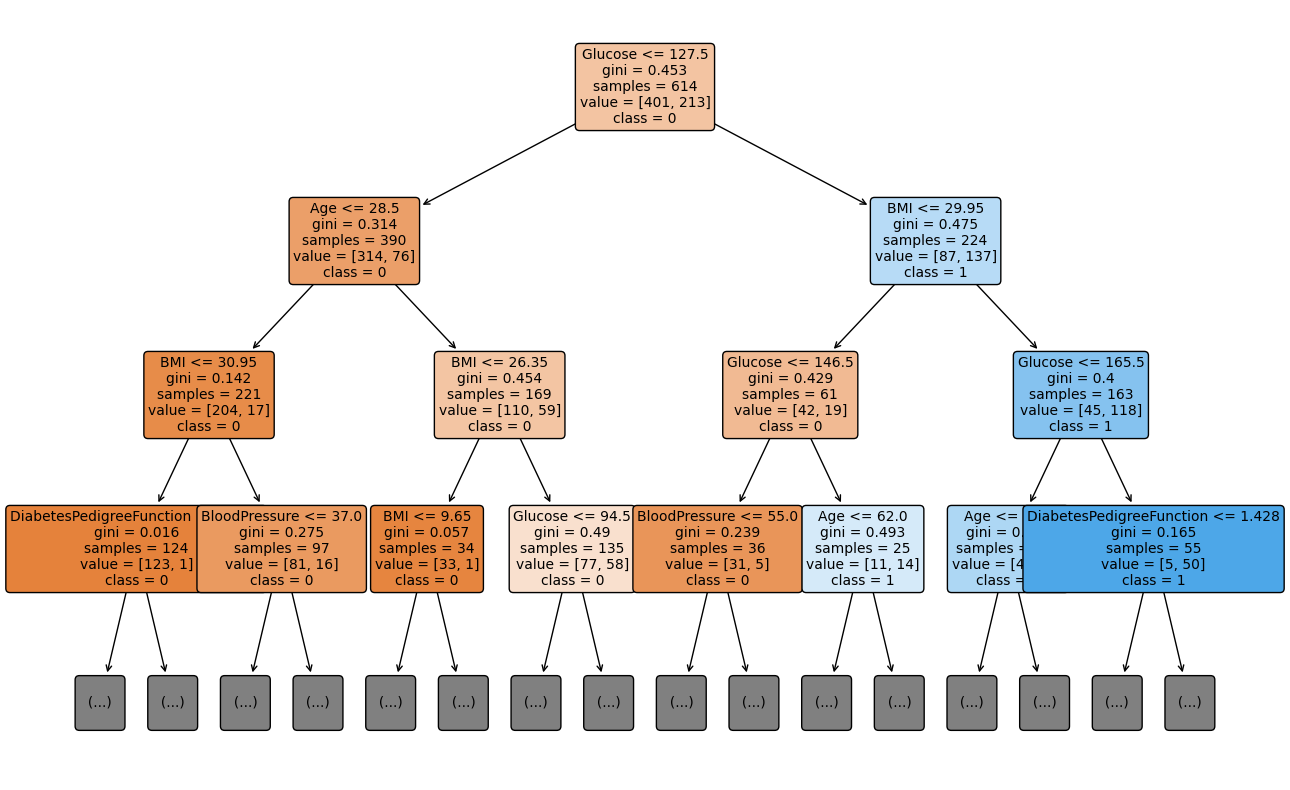

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(dt_classifier,
          feature_names=X.columns,
          class_names=['0', '1'],
          filled=True,
          rounded=True,
          max_depth=3,
          fontsize=10,
          label="all",
          ax=plt.gca())
plt.show()